1. 
    - a: flexible would be worse than inflexible, because there's a risk of overfitting
    - b: flexible would be worde because it needs more data
    - c: flexible would be better because it would fit curvy line better
    - d: flexible will be worse as it won't adapt good for the new dataset as it will follow noise more closely.

2. 
    - a: n=500 p=4 inference regression
    - b: n=20 p=13 prediciton classification
    - c: n=52 p=3 prediction regression

3. 
    Done with matplotlib and numpy:


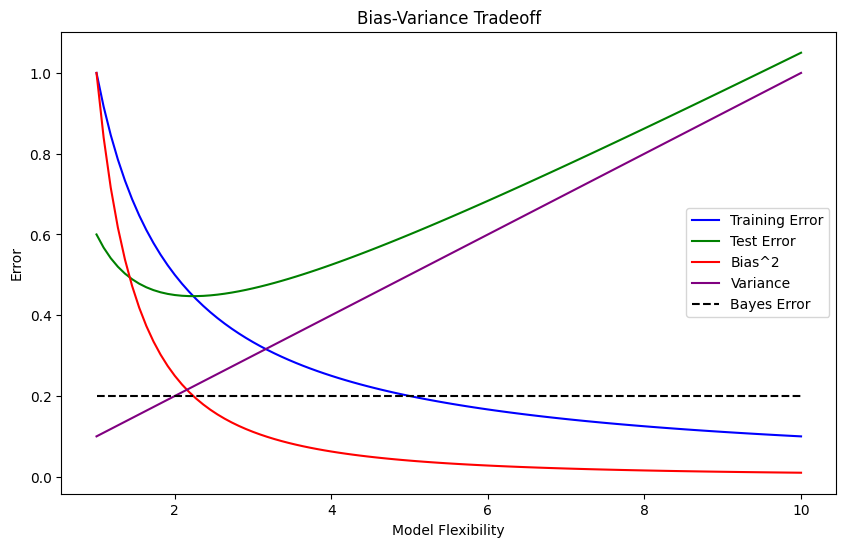

In [1]:
# 3 - a
import numpy as np
import matplotlib.pyplot as plt

# Define the range for flexibility (x-axis)
''' Creates an array of 100 evenly spaced values between 1 and 10.
 This array represents the flexibility of the models.'''
flexibility = np.linspace(1, 10, 100)

# Training error decreases with flexibility
training_error = np.maximum(0.1, 1 / flexibility)

# Test error has a U-shape
# Test error usually decreases initially then increases due to overfitting (U-shaped curve)
test_error = 0.5 / flexibility + flexibility / 10

# Bias decreases with flexibility
bias_squared = 1 / flexibility**2

# Variance increases with flexibility
variance = flexibility / 10

# Bayes error is constant
bayes_error = np.full_like(flexibility, 0.2)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(flexibility, training_error, label='Training Error', color='blue')
plt.plot(flexibility, test_error, label='Test Error', color='green')
plt.plot(flexibility, bias_squared, label='Bias^2', color='red')
plt.plot(flexibility, variance, label='Variance', color='purple')
plt.plot(flexibility, bayes_error, label='Bayes Error', color='black', linestyle='dashed')

plt.xlabel('Model Flexibility')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()

plt.show()


- 
    1. Let's classify people by their risk for getting diabetes in their middle age. Predictors would be BMI, average daily calorie intake, gender, height, weight, number of average active daily hours. The goal would be inference, so we would want to find the predictor that has the most impact on output.
    2. Let's classify couples by their capability of taking up credit from the bank. The predictors would be: yearly household income, average age of the couple, type of contracts as a calculated value, sum of existing financial liabilities. The goal is to classify with the output yes or no if they should be given this credit.
    
- 
    1. Prediction of car wear state based on year, mileage, type of car (sports, SUV, truck), engine displacement. Prediction score of car health like 80% without wear.
    2. Inference of the value of a used bicycle, make, model, components, weight, year of manufacturing, original price. What parameter has the biggest impact on the used bicycle price. The goal here is inference.
    3. Prediction of marathon time based on age, last times, weight, weekly number of training kilometers, and old marathon times with the historical predictors. 
    
- 
    1. For example, imagine if we want to look for talented kids in sprint. We would want to get: time, age, height, weight as our predictors. And the outcome of classification would be a prediction if the kid has a talent that should be pursued. So groups would be: Great talent, promise, and normal. The goal here is prediction.
    
I'm tired of this exercise already....
    

5.
- Flexible approach is better when we have a lot of data as it can better fit the training data, and with a large number of it, it won't follow the noise too closely.

- Flexible is better when we need prediction and not inference.

##### vs.

- Less flexible is better when the variance is high.
- Less flexible is better when there's low amount of the training data as it will follow the noise more closely.
- Less flexible is easier to interpret for the goal of inference.

6.

- Parametric statistical learning approach:
    - Simplifies choosing the model by dividing the problem into finding best parameters using average error rates on training data.
    - Easier to understand.
    - Uses classical statistical learning methods.
    - Not flexible enough for most real life problems, too many predictors.
    - Has a higher change of *underfitting*.

- Non-parametric statstical learning approach:
    - Needs a lot of data for creation of effective model.
    - Hard to understand.
    - Works with a high number of predictors.
    - Has a higher change of *overfitting*.


7. 
| Obs.        | X_1         | X_2         | X_3         | X_4         |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           | 0           | 3           | 0           | Red         |
| 2           | 2           | 0           | 0           | Red         |
| 3           | 0           | 1           | 3           | Red         |
| 4           | 0           | 1           | 2           | Green       |
| 5           | -1          | 0           | 1           | Red         |
| 6           | 1           | 1           | 1           | Red         |

In [3]:
# a)
import numpy as np
from sklearn.metrics import euclidean_distances

# Define the data points
data_points = np.array([
    [0, 3, 0],
    [2, 0, 0],
    [0, 1, 3],
    [0, 1, 2],
    [-1, 0, 1],
    [1, 1, 1]
])

# Define the test point
test_point = np.array([[0, 0, 0]])

# Compute the Euclidean distances
distances = euclidean_distances(data_points, test_point)

# Print the distances
print("Euclidean Distances from the test point to each observation:")
print(distances)

Euclidean Distances from the test point to each observation:
[[3.        ]
 [2.        ]
 [3.16227766]
 [2.23606798]
 [1.41421356]
 [1.73205081]]


In [5]:
# b) and c)

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the feature matrix (X) and the target array (y)
X = np.array([
    [0, 3, 0],  # X1, X2, X3 values for observation 1
    [2, 0, 0],  # Observation 2
    [0, 1, 3],  # Observation 3
    [0, 1, 2],  # Observation 4
    [-1, 0, 1], # Observation 5
    [1, 1, 1]   # Observation 6
])

y = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])  # X4 values as target labels

# Initialize the KNeighborsClassifier with K=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
# Fit the model
knn_1.fit(X, y)
# Predict using a test point where X1 = X2 = X3 = 0
prediction_1 = knn_1.predict([[0, 0, 0]])

# Initialize the KNeighborsClassifier with K=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
# Fit the model
knn_3.fit(X, y)
# Predict using the same test point
prediction_3 = knn_3.predict([[0, 0, 0]])

print(f"Prediction with K=1: {prediction_1[0]}")
print(f"Prediction with K=3: {prediction_3[0]}")

Prediction with K=1: Green
Prediction with K=3: Red


### d

A large value of K leads to a smoother decision boundary, as if the non-linearities where averaged out. We would expect the best value of K to be small. 

In [19]:
# 8
import pandas as pd

college = pd.read_csv('College.csv')

college2 = pd.read_csv('College.csv', index_col =0)

college3 = college.rename ({'Unnamed: 0': 'College '},
axis =1)
college3 = college3.set_index('College ')

college = college3

college

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [20]:
#c 
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


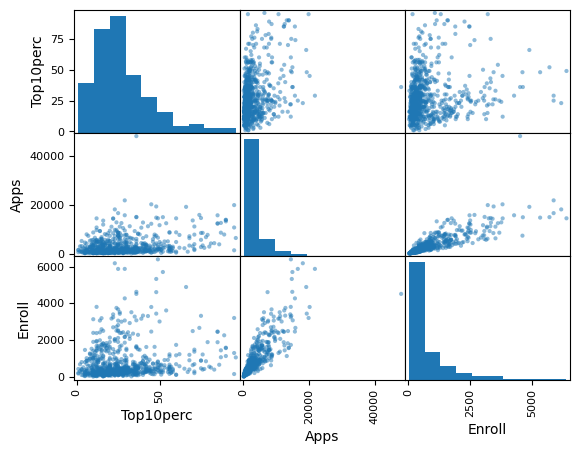

In [24]:
#d
d_columns_list = ["Top10perc", "Apps", "Enroll"]
pd.plotting.scatter_matrix(college[d_columns_list]);

<Axes: >

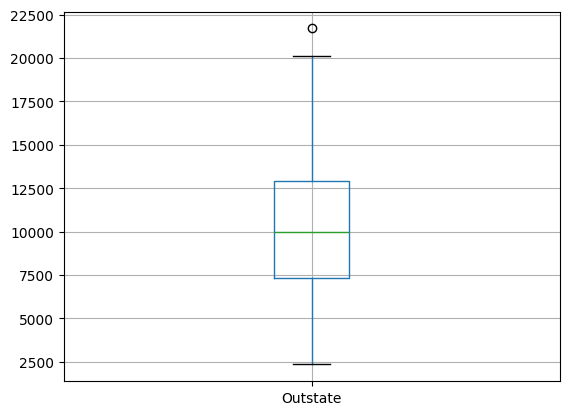

In [27]:
outstate_private_columns = ["Outstate", "Private"]
college[outstate_private_columns].boxplot()

In [33]:
college['Elite'] = pd.cut(college['Top10perc'],
[0,50,100],
labels =['No', 'Yes'],
)

college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

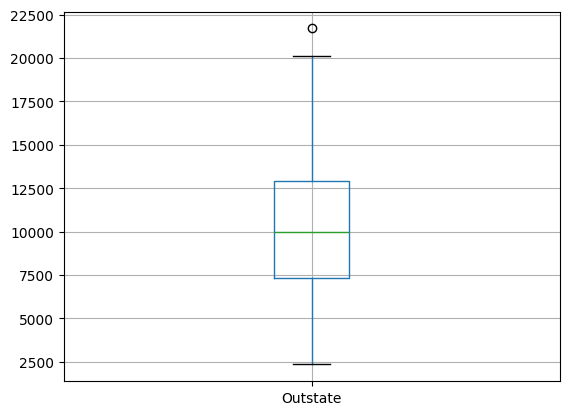

In [38]:
outstate_elite_columns = ["Outstate", "Elite"]
college[outstate_elite_columns].boxplot();

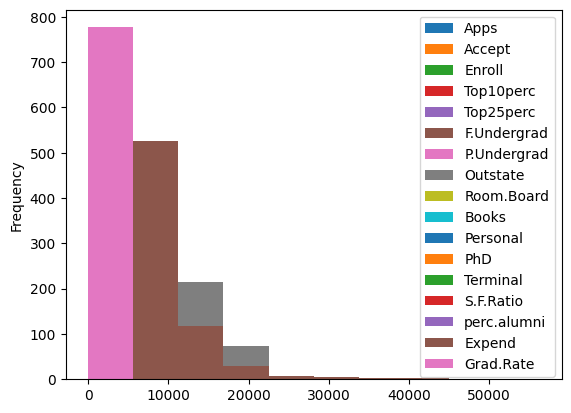

In [49]:
college.plot.hist();